In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
import pandas as pd
import runner
import umm
from imp import reload

In [92]:
reload(runner)
# instance_name="LOP-synthetic,seed=123456,n=20,m=200,phi=0.9"
# instance_name="pfsp/rec19.txt"
instance_name="lop/xLOLIB/N-be75eec_150"
# instance_name="lop/RandB/N-p50-20"
# instance_name="qap/nug12.dat"
budgetGA=5
seed=2
budget=100
m_ini=10
budgetMM=10
# ratio_samples_learn=0.10
# weight_mass_learn=0.9
res = []
np.set_printoptions(linewidth=np.nan)
for ratio_samples_learn in [.3]:
  for weight_mass_learn in [0.8]:

    out_filename="local_"#+instance_name.split("/")[1].split(".")[0]
    df = runner.run_once("uMM", instance_name, seed,budget = budget, m_ini = m_ini, budgetMM = budgetMM, 
                         ratio_samples_learn = ratio_samples_learn, weight_mass_learn = weight_mass_learn, out_filename = out_filename)
    res.append([out_filename,ratio_samples_learn, weight_mass_learn,df.Fitness.min()])
    print("best found",df.Fitness.min())
    #out_filename="local_new_CEGO"
    #runner.run_once("CEGO", instance_name, seed,budget = budget, m_ini = m_ini, budgetGA = budgetGA, out_filename = out_filename)

Reading instance from lop/xLOLIB/N-be75eec_150
identity, reverse and best know fitnesses 2097347.0 2077258.0 677365.0
best found 1771277.0


instance name 0    lop/xLOLIB/N-be75eec_150
Name: instance, dtype: object
1771277.0


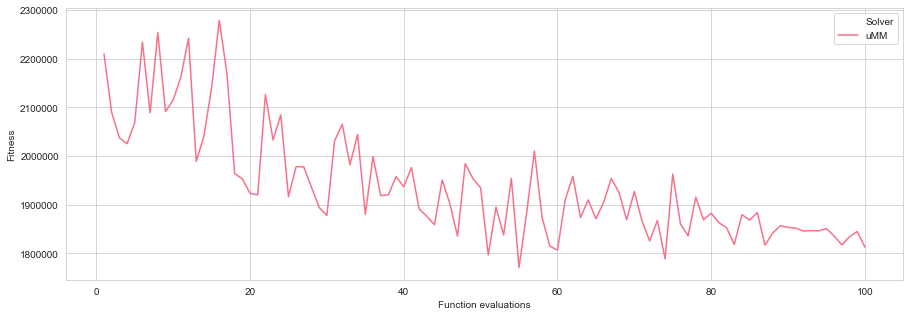

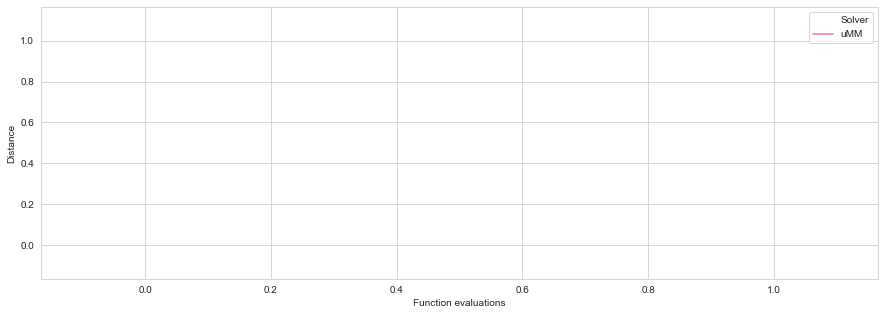

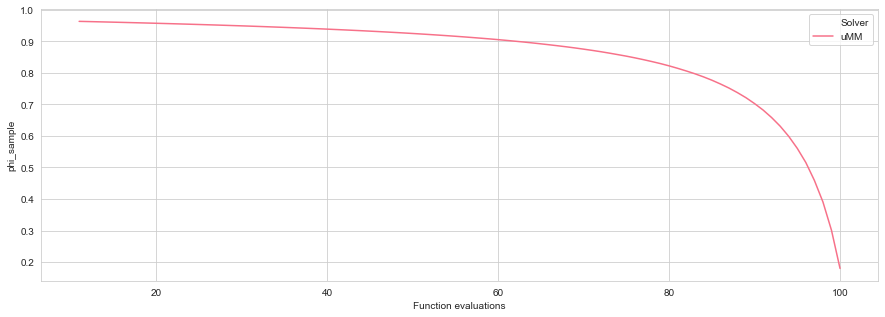

In [94]:
# instance_name="pfsp/rec05.txt"
out_filename="local_"#+instance_name.split("/")[1].split(".")[0]
df = pd.read_pickle(out_filename+'.pkl.gz')
#dfc, dfu = pd.read_pickle('local_new_CEGO.pkl.gz'),pd.read_pickle('local_new_uMM.pkl.gz');df = pd.concat([dfc, dfu]) 

print("instance name", df.instance.drop_duplicates())
sns.set_style("whitegrid")
print(df.Fitness.min())
# 'pickles/pickLocal.pkl')#pick570618.pkl

color_variable = 'Solver'
y_variables = ['Fitness','Distance','phi_sample']
palette = sns.color_palette("husl", len(df[color_variable].drop_duplicates()))
for y_variable in y_variables:
    plt.figure(figsize=(15,5))
    sns.lineplot(x='Function evaluations',y=y_variable,hue='Solver',data=df, palette=palette)
    plt.show()

In [33]:
reload(runner)
# instance_name="LOP-synthetic,seed=123456,n=20,m=200,phi=0.9"
# instance_name="pfsp/rec05.txt"
instance_name="lop/RandB/N-p50-01"
# instance_name="qap/nug12.dat"
budgetGA=5
seed=2
budget=50
m_ini=10
budgetMM=10
ratio_samples_learn=0.10
weight_mass_learn=0.9
res = []

for ratio_samples_learn in [.3]:
  for weight_mass_learn in [0.8]:

    out_filename="local_"#+instance_name.split("/")[1].split(".")[0]
    inst = runner.run_once("uMM", instance_name, seed,budget = budget, m_ini = m_ini, budgetMM = budgetMM, 
                         ratio_samples_learn = ratio_samples_learn, weight_mass_learn = weight_mass_learn, out_filename = out_filename)

Reading instance from lop/RandB/N-p50-01
test best and wort 29166.0 32174.0 16673.0


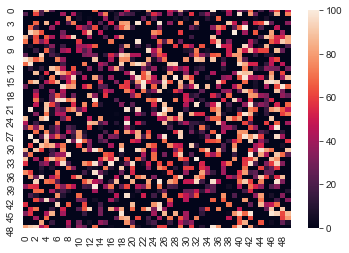

In [36]:
sns.heatmap(inst.instance)

<Figure size 1080x360 with 0 Axes>

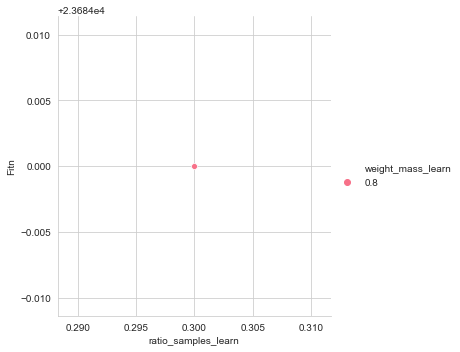

In [74]:
dfres = pd.DataFrame(res,columns=['instance', 'ratio_samples_learn', 'weight_mass_learn','Fitn'])
dfres
palette = sns.color_palette("husl", len(dfres["weight_mass_learn"].drop_duplicates()))
plt.figure(figsize=(15,5))
sns.relplot(data=dfres,x='ratio_samples_learn',y='Fitn',hue="weight_mass_learn", style="weight_mass_learn",palette=palette)
plt.show()